# 《神经网络与深度学习》学习笔记
## 第2章 机器学习概述
* **机器学习**就是让计算机从数据中进行自动学习，得到某种知识或者规律。
* 机器学习问题在早期的工程领域被称为**模式识别**。

### 2.1 基本概念
* 与数据有关：特征(属性)、标签、样本、数据集、训练集、测试集、训练样本、测试样本、特征向量。
* 与学习有关：学习算法、学习、训练、模型。

### 2.2 机器学习的三个基本要素
* 模型、学习准则、优化算法

#### 2.2.1 模型
* 线性模型
* 非线性模型：多个非线性基函数嵌套

#### 2.2.2 学习准则
* 经验风险最小化、结构风险最小化
* 损失函数：
  * 0-1损失函数
  * 平方损失函数：$\mathcal{L}(y, f(\mathbf{x} ; \theta))=\frac{1}{2}(y-f(\mathbf{x} ; \theta))^{2}$，用于回归问题
  * 交叉熵损失函数：$\mathcal{L}(y, f(\mathbf{x} ; \theta))=-\sum_{c=1}^{C}y_{c}\log f_{c}(\mathbf{x} ; \theta)$，多分类问题，C为类别，$y$为one-hot向量
  * Hinge损失函数：$\mathcal{L}(y, f(\mathbf{x} ; \theta))= \max \left(0 , 1 -y f(\mathbf{x} ; \theta)\right)$，两类分类问题
* 过拟合：在损失函数中加入正则化项

#### 2.2.3 算法优化
* 梯度下降算算法：学习率、提前停止(避免过拟合)
* 随机梯度下降：每次优化用一个随机的样本
* 小批量梯度下降：每次优化使用一小部分样本

### 2.3 机器学习的简单示例：线性回归
* **线性回归**是机器学习和统计学中最基础和广泛应用的模型，分为简单回归(自变量数量为1)和多元回归。
* $f(\mathbf{x} ; \mathbf{w}, b)=\mathbf{w}^{\mathrm{T}} \mathbf{x}+b$ 或者 $f(\mathbf{x} ; \hat{\mathbf{w}})=\hat{\mathbf{w}}^{\mathrm{T}} \hat{\mathbf{x}}$(简化)

#### 2.3.1 参数学习
* 经验风险最小化：
  * 经验风险：$\mathcal{R}\left(\mathbf{w}\right)=\frac{1}{2}\left\|\mathbf{y}-X^{\mathrm{T}} \mathbf{w}\right\|^{2}$
  * 经验风险对$\mathbf{w}$求偏导：$\begin{aligned} \frac{\partial \mathcal{R}(\mathbf{w})}{\partial \mathbf{w}} =-X\left(\mathbf{y}-X^{\mathrm{T}} \mathbf{w}\right) \end{aligned}$
  * 偏导为0时：$\mathbf{w}^{*} = \left(XX^{T}\right)^{-1}X\mathbf{y}$
* 结构风险最小化：
  * 结构风险：$\mathcal{R}\left(\mathbf{w}\right)=\frac{1}{2}\left\|\mathbf{y}-X^{\mathrm{T}} \mathbf{w}\right\|^{2} + \frac{1}{2}\lambda\left\|\mathbf{w}\right\|^{2}$
* 极大似然估计：
  * 似然估计结果：$\mathbf{w}^{ML} = \left(XX^{T}\right)^{-1}X\mathbf{y}$，与经验风险最小化一样
* 最大后验估计：
  * 暂略

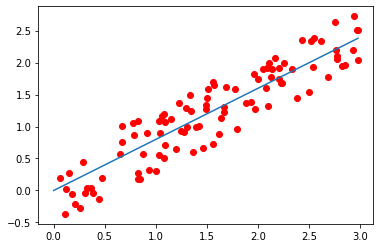

In [2]:
# 线性回归Pytorch实现
import torch, matplotlib.pyplot
import matplotlib.pyplot as plt

# 自变量维度、因变量维度和样本数量
v_x, v_y, N = 1, 1, 100

# 数据生成
X = torch.rand([v_x, N]) * 3
W = torch.rand([v_x, v_y]) * 3
nois = torch.rand([N, v_y]) - 0.5 # 为了使得数据更加真实，加入噪声
Y = X.t().mm(W) + nois

# 按照公式求最有参数
W_a = X.mm(X.t()).inverse().mm(X).mm(Y)

if v_x == v_y == 1:
    # 如果维度都为1则输出可视化图片
    plt.plot(X[0], Y.t()[0], 'ro') # 散点绘制
    plt.plot([0,max(X[0])], [0,max(X[0])*W_a[0]]) # 最优直线绘制
    plt.show()
else:
    # 如果维度不为1则输出W矩阵
    print("W：\t", W)
    print("W*：\t", W_a)

### 2.4 偏差-方差分解
* 期望错误可以被分解为偏差(bias)与方差(variance)。
* 高偏差代表范化能力差，高方差代表拟合能力差。
* 正则化细数$\lambda$可以控制模型的复杂度，当$\lambda$变大时，模型的复杂度降低，会减少方差，避免过拟合，但是偏差会上升。因此一个好的$\lambda$需要在方差与偏差之间取得比较好的平衡。

### 2.5 机器学习算法的类型
* 监督学习：训练集中每个样本都有标签。
  * 回归、分类
* 无监督学习：从不包含目标标签的训练样本中自动学习到一些有价值的信息。
  * 聚类、密度估计、特征学习、降维
* 强化学习：通过交互不断学习并调整策略，从而获得最大化的期望总回报。

### 2.6 数据特征表示
* 图像特征
* 文本特征：词袋模型
* 表示学习：第一章节有提到，又叫特征学习，可以减少预测模型复杂性、缩短训练时间、提高模型泛化能力、避免过拟合。

#### 2.6.1 传统的特征学习
* 特征选择：保留有用的特征，移除冗余或者无关的特征。
  * 子集搜索、$\mathcal{l}_{1}$正则化
* 特征抽取：又被称为降维，将原始特征投影在一个新的空间。

#### 2.6.2 深度学习方法
* 贡献度分配问题

### 2.7 评价指标
* 准确率、错误率
* 查准率(精度)、查全率(召回率)、F值
* 宏平均、微平均
* 交叉验证

### 2.8 理论和定理
* PAC学习理论(Probably Approximately Correct)
  * 同等条件下，模型越复杂泛化误差越大。同一模型在样本满足一定条件的情况下，其数量越大，模型泛化误差越小，因此还可以说模型越复杂越吃样本。
* 没有免费午餐定理
  * 对于基于迭代的最优算法，不存在某种算法对所有问题都有效。必须要“具体问题具体分析”。
* 丑小鸭定理
  * 丑小鸭与白天鹅之间的区别和两只白天鹅之间的区别一样大。
* 奥卡姆剃刀
  * 如无必要，勿增实体。
* 归纳偏置
  *  在机器学习中，很多学习算法经常会对学习的问题做一些假设，这些假设就称之归纳偏置。